<div style="text-align: center; padding: 25px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 10px; margin-bottom: 30px;">
    <h1 style="color: white; margin: 0; font-size: 2.5em; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Fuzzy Logic Control System
    </h1>
    <h2 style="color: #f0f0f0; margin: 10px 0; font-weight: 300; font-size: 1.4em;">
        Temperature-Based Speed Regulation
    </h2>
    <p style="color: white; margin-top: 20px; font-size: 1.1em;">
        Author: <strong>Youness Boumlik</strong>
    </p>
</div>

## 1. Importing Libraries

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

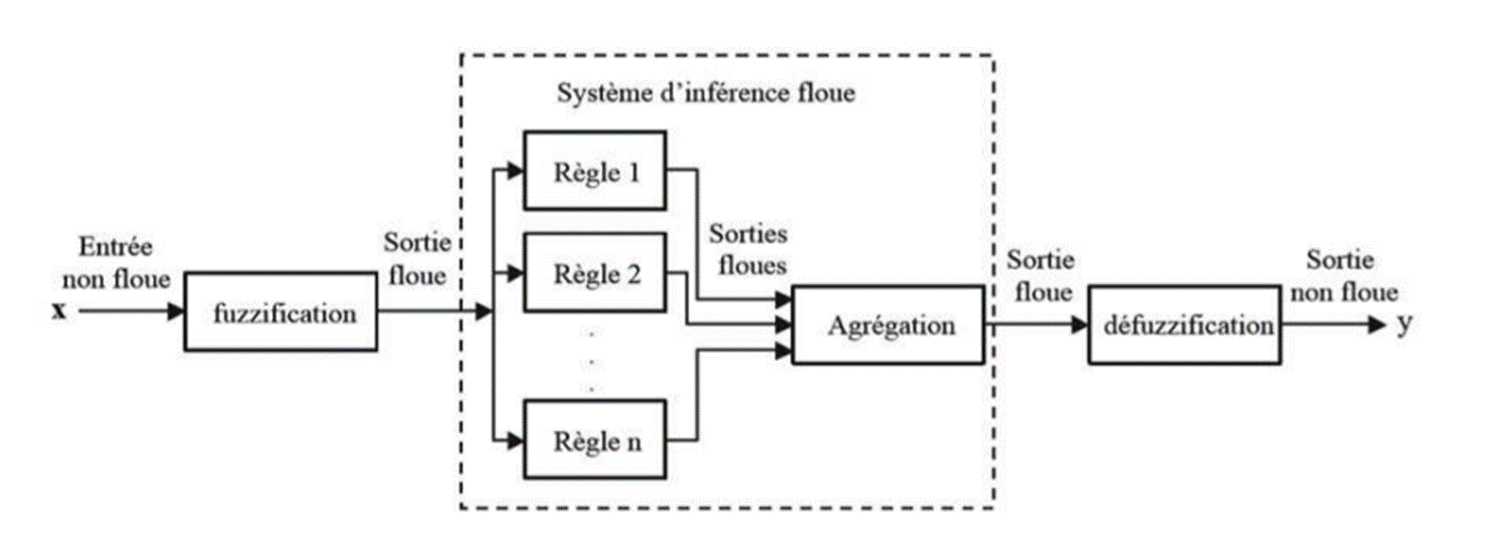

## 2. Defining Fuzzy Variables (Linguistic Variables)

In [52]:
temperature = ctrl.Antecedent(np.arange(10, 50, 1), 'temperature')
temperature

Antecedent: temperature

In [53]:
vitesse = ctrl.Consequent(np.arange(0, 100, 1), 'vitesse')
vitesse.automf(names=['faible', 'moyenne', 'elevée'])
vitesse

Consequent: vitesse

## 3. Defining Membership Functions

### For temperature:
- **Cold**: triangular membership function [10, 10, 20]
- **Comfortable**: triangular membership function [15, 25, 30]
- **Hot**: triangular membership function [27, 50, 50]

In [54]:
temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaud'] = fuzz.trimf(temperature.universe, [27, 50, 50])

## 4. Visualizing Membership Functions

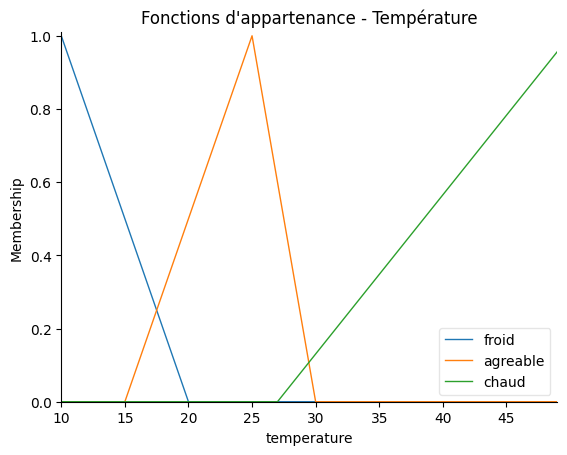

In [55]:
temperature.view()
plt.title('Fonctions d\'appartenance - Température')
plt.show()

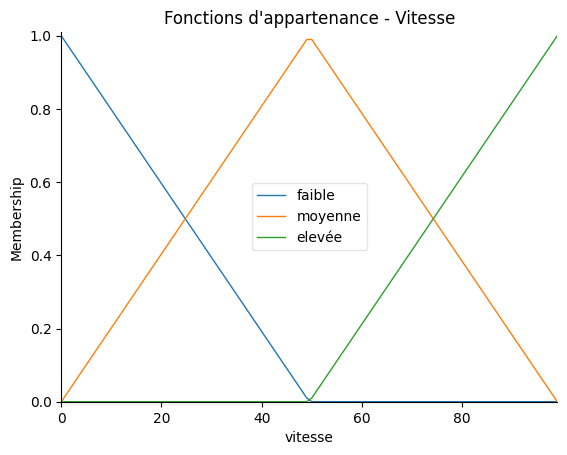

In [56]:
vitesse.view()
plt.title('Fonctions d\'appartenance - Vitesse')
plt.show()

## 5. Defining Fuzzy Rules

In [57]:
rule1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
rule2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
rule3 = ctrl.Rule(temperature['chaud'], vitesse['elevée'])

## 6. Creating the Fuzzy Control System

In [58]:
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
vitesse_simulator = ctrl.ControlSystemSimulation(vitesse_ctrl)

## 7. Testing with μ(18°C)

In [59]:
print(fuzz.interp_membership(temperature.universe, temperature['froid'].mf, 18))
print(fuzz.interp_membership(temperature.universe, temperature['agreable'].mf, 18))
print(fuzz.interp_membership(temperature.universe, temperature['chaud'].mf, 18))

0.2
0.3
0.0


In [60]:
vitesse_simulator.input['temperature'] = 18
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

47.755282778056845


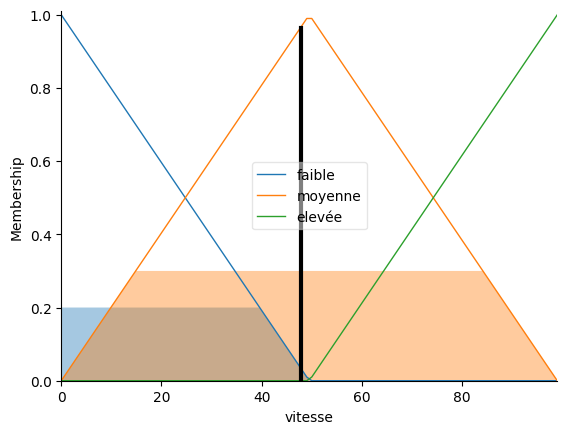

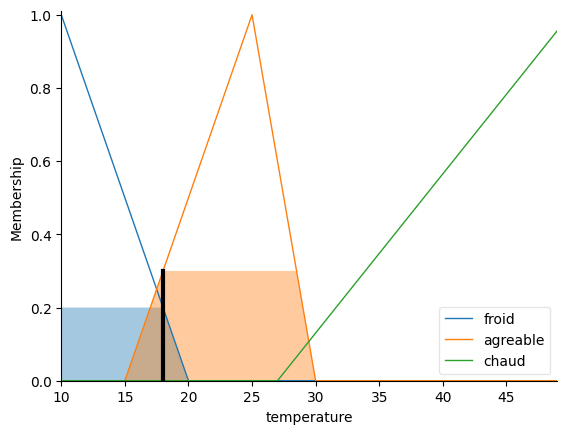

In [61]:
vitesse.view(sim=vitesse_simulator)
temperature.view(sim=vitesse_simulator)

## 8. Testing with μ(28°C)

In [62]:
print(fuzz.interp_membership(temperature.universe, temperature['froid'].mf, 28))
print(fuzz.interp_membership(temperature.universe, temperature['agreable'].mf, 28))
print(fuzz.interp_membership(temperature.universe, temperature['chaud'].mf, 28))

0.0
0.4
0.043478260869565216


In [63]:
vitesse_simulator.input['temperature'] = 28
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

49.573870307174836


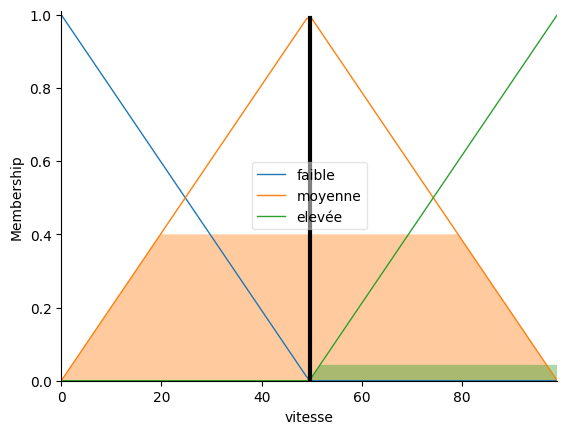

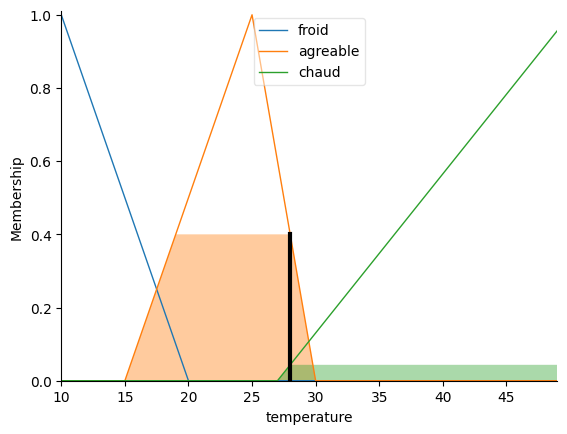

In [64]:
vitesse.view(sim=vitesse_simulator)
temperature.view(sim=vitesse_simulator)